In [273]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.metrics import classification_report, confusion_matrix
import graphviz 

In [274]:
data=pd.read_csv('Titanic.csv')
data

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3rd,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.454200,NaN,Cherbourg,NaN,328.0,NaN
1305,1306,3rd,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.454200,NaN,Cherbourg,NaN,NaN,NaN
1306,1307,3rd,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.225000,NaN,Cherbourg,NaN,304.0,NaN
1307,1308,3rd,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.225000,NaN,Cherbourg,NaN,NaN,NaN


In [275]:
# DataFrame=pclass + sex + age + sibsp---> survived

data['pclass'].replace('1st',1,inplace=True)
data['pclass'].replace('2nd',2,inplace=True)
data['pclass'].replace('3rd',3,inplace=True)

data['sex'].replace('female',0,inplace=True)
data['sex'].replace('male',1,inplace=True)

data['age'].fillna(data['age'].median(),inplace=True)

data=data[['pclass','sex','age','sibsp','survived']]
data

,pclass,sex,age,sibsp,survived
0,1,0,29.0000,0,1
1,1,1,0.9167,1,1
2,1,0,2.0000,1,0
3,1,1,30.0000,1,0
4,1,0,25.0000,1,0
...,...,...,...,...,...
1304,3,0,14.5000,1,0
1305,3,0,28.0000,1,0
1306,3,1,26.5000,0,0
1307,3,1,27.0000,0,0


In [276]:
# Randomly splitting data into 80%-Trainin 20%-Test
x_data=data[['pclass','sex','age','sibsp']]
y_data=data['survived']
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,train_size=0.8, random_state=None, shuffle=True, stratify=None)
print(np.shape(x_train))
print(np.shape(x_test))
print(np.shape(y_train))
print(np.shape(y_test))

(1047, 4)
(262, 4)
(1047,)
(262,)


In [277]:
model=DecisionTreeClassifier()
model_fit=model.fit(x_train,y_train)

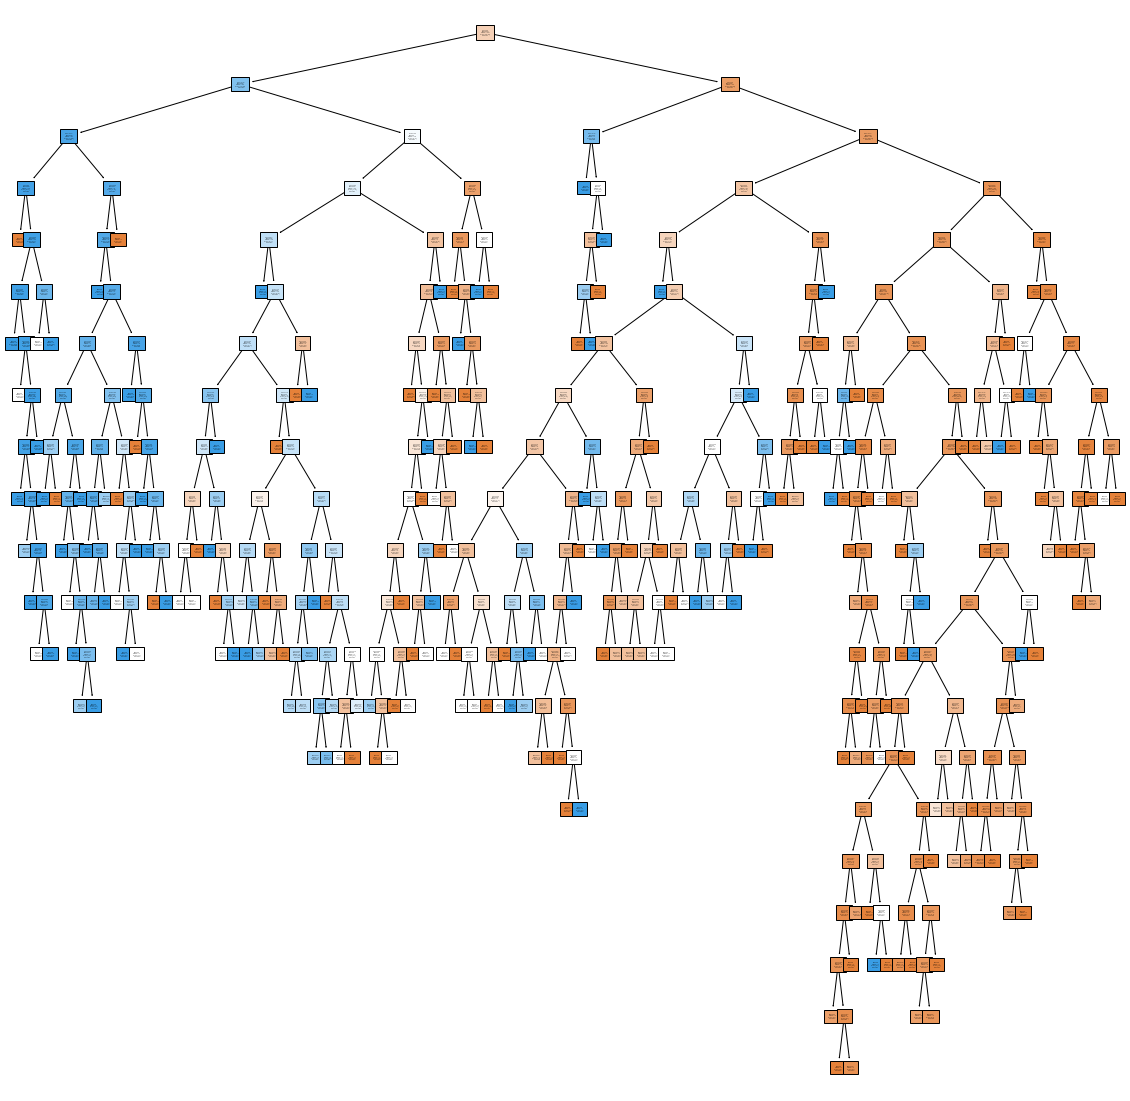

In [278]:
features=['pclass','sex','age','sibsp']
classes=['Yes','No']

fig = plt.figure(figsize = (20,20))
plot_tree(model_fit,
          feature_names=features,
          class_names=classes,filled=True,fontsize=1)
plt.show()

In [279]:
# Step-3
nodes=[i for i in range(2,20)]
parameters={'criterion':['gini'],'max_leaf_nodes':nodes}

model2=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=parameters,scoring='accuracy')
model2_fit=model2.fit(x_train,y_train)

In [280]:
model2_fit.best_params_

{'criterion': 'gini', 'max_leaf_nodes': 19}

In [281]:
model3=DecisionTreeClassifier(max_leaf_nodes=model2_fit.best_params_['max_leaf_nodes'])
model3_fit=model3.fit(x_train,y_train)

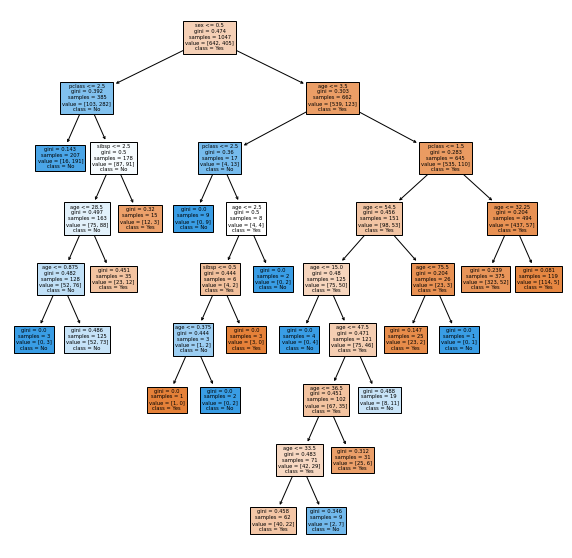

In [282]:
features=['pclass','sex','age','sibsp']
classes=['Yes','No']

fig = plt.figure(figsize = (10,10))
plot_tree(model3_fit,
          feature_names=features,
          class_names=classes,filled=True)
plt.show()

In [283]:
# Step-4
pruned_tree_prediction=model3_fit.predict(x_test)

cm=np.array(confusion_matrix(y_test,pruned_tree_prediction,labels=[1,0]))
confusion=pd.DataFrame(cm,index=['Survived','Non-Survived'],columns=['Predicted Survived','Predicted Non-Survived'])
confusion

,Predicted Survived,Predicted Non-Survived
Survived,57,38
Non-Survived,19,148


In [291]:
pred_surv_decisontree=confusion['Predicted Survived'].values[0]/(sum(confusion['Predicted Survived'].values))
pred_fatal_decisontree=confusion['Predicted Non-Survived'].values[1]/(sum(confusion['Predicted Non-Survived'].values))

print('Percent_Survivors_Correctly_Predicted=',pred_surv_decisontree)
print('Percent_Fatalities_Correctly_Predicted=',pred_fatal_decisontree)

Percent_Survivors_Correctly_Predicted= 0.75
Percent_Fatalities_Correctly_Predicted= 0.7956989247311828


In [292]:
# Step-5
model_rf=RandomForestClassifier(n_estimators=50,max_leaf_nodes=model2_fit.best_params_['max_leaf_nodes'])
model_rf_fit=model_rf.fit(x_train,y_train)
rf_prediction=model_rf_fit.predict(x_test)

In [293]:
cm2=np.array(confusion_matrix(y_test,rf_prediction,labels=[1,0]))
confusion2=pd.DataFrame(cm2,index=['Survived','Non-Survived'],columns=['Predicted Survived','Predicted Non-Survived'])
confusion2

,Predicted Survived,Predicted Non-Survived
Survived,58,37
Non-Survived,14,153


In [294]:
pred_surv_rf=confusion2['Predicted Survived'].values[0]/(sum(confusion2['Predicted Survived'].values))
pred_fatal_rf=confusion2['Predicted Non-Survived'].values[1]/(sum(confusion2['Predicted Non-Survived'].values))

print('Percent_Survivors_Correctly_Predicted=',pred_surv_rf)
print('Percent_Fatalities_Correctly_Predicted=',pred_fatal_rf)

Percent_Survivors_Correctly_Predicted= 0.8055555555555556
Percent_Fatalities_Correctly_Predicted= 0.8052631578947368


In [299]:
data={'Decision Tree':[pred_surv_decisontree,pred_fatal_decisontree],'Random Forest':[pred_surv_rf,pred_fatal_rf]}
comparison=pd.DataFrame(data,index=['Percent Survivors Correctly Predicted','Percent Fatalities Correctly Predicted'])
comparison

,Decision Tree,Random Forest
Percent Survivors Correctly Predicted,0.750000,0.805556
Percent Fatalities Correctly Predicted,0.795699,0.805263


As we can see above there is imporovement  after we use the Random Forest method